In [8]:
import numpy as np
import math
import pandas as pd
from IPython.display import Image, display
from CoolProp.HumidAirProp import HAProps
import import_ipynb
import matplotlib.pyplot as plt
from PsychrometricProperty import W_ptr, Tdp_ptr, h_ptr, v_ptr, W_ptb,RH_ptb,Tdp_ptb,h_ptb,v_ptb,Tdp_ptW,h_ptw,RH_ptw,W_pth,RH_pth,T_pwh

### Example 1
A building space is to be maintained at $70°F$ and $35\%$ RH when outdoor design temperature is $10°F$. Design heat losses from the space are $250,000 Btu/hr$, sensible, and $45,000 Btu/h$, latent. Ventilation requires that $1500 cfm$ of outdoor air be used. Supply air is to be at $120°F$. Determine:\
a. the amount of supply air required, lbm/hr, and CFM.\
b. the capacity of the heating coil, Btu/hr, if 1.the humidifieier is a spray washer using circulated spray water with mackeup water provided at $60°F$\2. the humidifieier is a steam humidifier using saturated steam at $17.2 psia$.\
c. the capacity of the humidifier, lbm/hr.


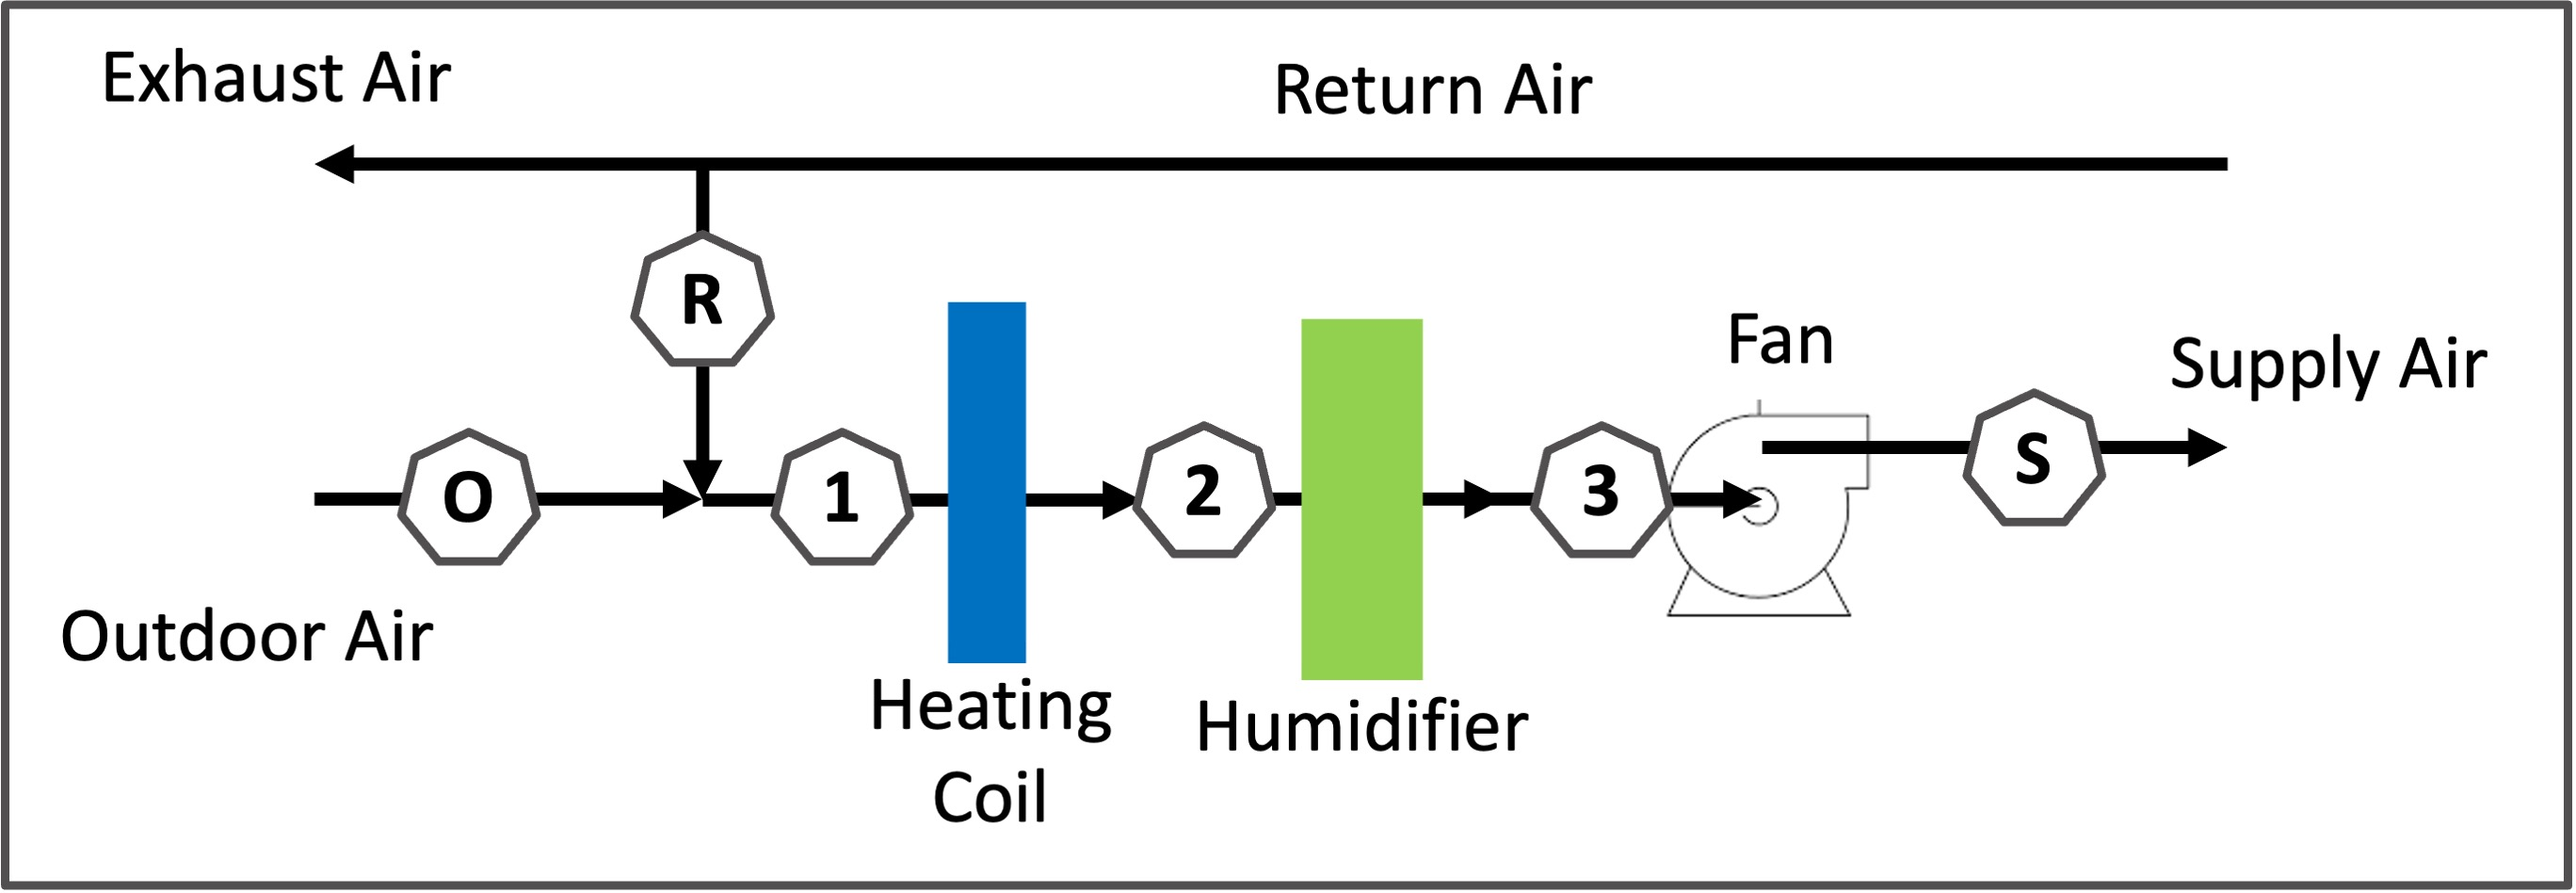

In [11]:
display(Image(filename='AirProcessing_E1.jpg')) 

In [31]:
P_atm = 14.7 # standard atmosphere pressure, [psi]
V_dot_ven = 1500 # the ventilation volume flow rate [cfm]
T_db_RA = 70 # return air drybulb temperature [F]
RH_RA = 35 # return air wetbulb temperature [F]
h_RA = h_ptr(P_atm,T_db_RA,RH_RA) # return air humidity ratio [Btu/lba]
w_RA = W_ptr(P_atm,T_db_RA,RH_RA) # return air humidity ratio [lb_w/lb_a]
v_RA = v_ptr(P_atm,T_db_RA,RH_RA) # return air specific volumn [ft3/lbm]

T_db_OA = 10 # return air drybulb temperature [F]
w_OA = 0
h_OA = h_ptr(P_atm,T_db_RA,0)


#### Step 1: to determine the amount of supply air
The supply air is delivered to the space changing from $120°F$ to $70°F$ to adress the sensible heating load in the space.  We can determine a point $x$ where the temperature of point is equal to the supply air temperature and the humidity ratio of $x$ is equal to that of the space air (return air), we can determine the enthalpy of point $x$ as follows:
$$h_x = @(P_{atm}, T_{db,SA}, w_{RA})$$
Based on the energy balance for space:
$$\dot{Q}_{sen,load} = \dot{m}_{SA} * (h_x - h_{RA})$$



In [29]:
Q_sen_load = 250000
T_db_SA = 115
h_x = h_ptw(P_atm,T_db_SA,w_RA) #calculate the enthalpy of point x
m_dot_SA = Q_sen_load/(h_x-h_RA)
V_dot_SA = m_dot_SA * v_RA/60
V_dot_cir = V_dot_SA - V_dot_ven
v_OA = 12.85
m_dot_ven = V_dot_ven/v_OA * 60
m_dot_cir = m_dot_SA - m_dot_ven
data = {
    "": ["Outdoor Air", "Recirculated Air", "Supply Air"],
    "Volume flow rate [CFM]": [f"{V_dot_ven:.2f}", f"{V_dot_cir:.2f}",f"{V_dot_SA:.2f}"],
    "Mass flow rate [lbm/hr]": [f"{m_dot_ven:.2f}", f"{m_dot_cir:.2f}",f"{m_dot_SA:.2f}"]
}
df = pd.DataFrame(data)
df

,,Volume flow rate [CFM],Mass flow rate [lbm/hr]
0,Outdoor Air,1600.00,7470.82
1,Recirculated Air,3542.55,15447.26
2,Supply Air,5142.55,22918.08


#### Step 2. Determine the state 1 after mixing the return air and ventilation (outdoor) air:
For the mixing point, based on the mass balance of the mositure:
$$\dot{m}_{ven} w_{OA} + \dot{m}_{cir} w_{RA} = \dot{m}_{SA} w_{1}$$
Based on the energy balance:
$$\dot{m}_{ven} h_{OA} + \dot{m}_{cir} h_{RA} = \dot{m}_{SA} h_{1}$$
Thus, the humidity ratio is:
$$w_{1} = \frac{\dot{m}_{ven} w_{OA} + \dot{m}_{cir} w_{RA}}{\dot{m}_{SA}}$$
the enthalpy is: 
$$h_{1} = \frac{\dot{m}_{ven} h_{OA} + \dot{m}_{cir} h_{RA}}{\dot{m}_{SA}}$$

In [32]:
w_1 = (m_dot_ven * w_OA + m_dot_cir * w_RA)/m_dot_SA # humidity ratio at state 3, [lbw/lba]
h_1 = (m_dot_ven * h_OA + m_dot_cir * h_RA)/m_dot_SA # enthalpy at state 3, [Btu/lba]
T_db_1 = T_pwh(P_atm, w_1, h_1) # dry-bulb at state 3, F
RH_1 = RH_ptw(P_atm, T_db_1, w_1) # relative humidity at state 3, %

#### Step 3. Determine the capacity of the humidifier
$$H = \dot{m}_{SA} (w_{SA}-w_1)$$

In [ ]:
Q_lat_load = 45000

H = m_dot_SA * (w_SA-w_1)